<a href="https://colab.research.google.com/github/DianaCarolinaCabrera/DianaCarolinaCabrera.github.io/blob/master/Machine_learning_with_MLlib_Spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/DianaCarolinaCabrera/DianaCarolinaCabrera.github.io/master/Spark.png" width="1000" align="center"/>

# Diana Carolina Cabrera Torres
* Mechatronics Engineer
* Master student Systems and Computing Engineering on Research modality
* Passionate About Data Science And Quantum Computing

# First challenge Machine Learning on Spark
---

###Spark
---

Motor de procesamiento general, rápido e ideal para datos a gran escala en memoria. Spark depende de conceptos de la programación funcional, debido a que esta programado en Scala y esté corre en la máquina virtual de Java.

Cuando deseas empezar en spark, es necesario tener en cuenta la versión de Spark y si te gusta trabajar con lineas de comandos hay dos opciones:

1.   Python: Ejecutar $ Pyspark

2.   Scala: Ejecutar $ spark-shell

Cada aplicación de spark requiere un contexto, pero cuando trabajas con versiones mayores a Spark 2.0, automaticamente se crea un spark-session provee un spark context configurado. Si trabajas con versiones previas, es necesario declarar un spark context como punto de entrada a las funcionalidades de Spark para generar jobs

Spark puede ejecutarse de tres formas:


1.   Localmente (Procesamiento no distribuido)
2.   Localmente con multiples workers
3.   Sobre un cluster







###Aprendizaje Supervisado
---

El algoritmo aprende desde datos tomados como ejemplos asociados a un objetivo, con el fin de predecir la respuesta correcta. Se dividen en: 

<img src="https://raw.githubusercontent.com/DianaCarolinaCabrera/DianaCarolinaCabrera.github.io/master/ML.PNG" width="500" align="center"/>

1.   Regresión  - categorias de datos
2.   Clasificación - datos continuos




###Librerías
---

1.   Pip - Es una utilidad de la línea de comandos, permite instalar librerías y paquetes de Python
2.   Pyspark - Librería para trabajar SQL con una gran cantidad de datos
3.   Koalas - Permite ser productivo cuando se trata de grandes cantidad de datos. Si deseas revisar a fondo, ir al siguiente enlace https://koalas.readthedocs.io/en/latest/index.html




In [ ]:
 ! pip install pyspark
 ! pip install pandas-profiling==2.8.0

     |████████████████████████████████| 204.7MB 62kB/s 
     |████████████████████████████████| 204kB 9.4MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.0-py2.py3-none-any.whl size=205044182 sha256=b83aa12028715d626dc1e6e5effa9d4299b9ba87d66db5c9e912794a6c1bfc41
  Stored in directory: /root/.cache/pip/wheels/57/27/4d/ddacf7143f8d5b76c45c61ee2e43d9f8492fc5a8e78ebd7d37
Successfully built pyspark
     |████████████████████████████████| 266kB 2.8MB/s 
     |████████████████████████████████| 71kB 5.2MB/s 
     |████████████████████████████████| 61kB 5.1MB/s 
     |████████████████████████████████| 3.1MB 9.1MB/s 
     |████████████████████████████████| 604kB 32.2MB/s 
     |████████████████████████████████| 71kB 7.4MB/s 
     |████████████████████████████████| 296kB 34.4MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=039ef15282eb03dc1b7d38b0538f993412d41f8d6330c4aacbff622b18101b65
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7

In [ ]:
# Importar el modulo de Pyspark
from pyspark.sql import SparkSession
from pyspark import SparkContext, SparkConf
from pyspark.sql.functions import round
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler

# Importar perfilamiento de pandas
from pandas_profiling import ProfileReport

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
##Crear SparkContext
sc = SparkContext.getOrCreate()

# Crear SparkSession
spark = SparkSession.builder \
                    .master('local[*]') \
                    .appName('SparkML') \
                    .getOrCreate()

In [ ]:
print(spark.version)

3.0.0


## 1. Determinar el objetivo
---

*Descripción dataset*: pima-indians-diabetes-database

Este conjunto de datos fue tomado Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. 

*Objetivos*: El objetivo del conjunto de datos es predecir de forma diagnóstica si un paciente tiene diabetes o no, basándose en determinadas medidas de diagnóstico incluidas en el conjunto de datos. 

Nota: Los conjuntos de datos constan de varias variables predictoras médicas y una variable objetivo, Resultado. Las variables predictoras incluyen el número de embarazos que ha tenido la paciente, su IMC, nivel de insulina, edad, etc.

## 2. Exploración del Dataset
---

Descargue el conjunto de datos de diabetes de los indios Pima. Cargue el conjunto de datos. La columna de resultado corresponde a la etiqueta de la clase, las otras columnas a las características de entrada.

In [ ]:
!mkdir ~/.kaggle

In [ ]:
%%writefile ~/.kaggle/kaggle.json
{"username":"dianacabrera20","key":"798285e2ff546959a46585533ae3113f"}

Writing /root/.kaggle/kaggle.json


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d uciml/pima-indians-diabetes-database
!unzip pima-indians-diabetes-database.zip

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 15.1MB/s]
Archive:  pima-indians-diabetes-database.zip
  inflating: diabetes.csv            


### 2.1 Datos implementados con spark.read.csv

Trabajar con Koalas:

Libreria de python puro
- Unifica los dos ecosistemas con un API familiar
- Transición sin problemas entre los datos pequeños y los grandes
- Soporta columnas con multiples indices


Algunos comandos con las diferencias entre trabajar con pandas y trabajar con Spark Dataframe

<img src="https://raw.githubusercontent.com/DianaCarolinaCabrera/DianaCarolinaCabrera.github.io/master/Spark_pandas.PNG" width="500" align="center"/>

In [ ]:
## No es la mejor forma de trabajar datasets. Databricks on Koalas
labels = spark.read.csv('/content/diabetes.csv',
                         sep=',',
                         header=True,
                         inferSchema=True,
                         nullValue='NA'
                        )

### 2.2 Descripción de los datos

In [ ]:
labels.printSchema()

root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)



### 2.3 Obtención de los datos

In [ ]:
# Obtener a través de un count, el numero de registros de mi Dataframe
print("The data contain %d records." % labels.count())

The data contain 768 records.


In [ ]:
labels.show(5)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 5 rows



In [ ]:
X = labels.drop('Outcome')
y = labels.Outcome

labels.describe() 
print('labels:', X.show(5))
print('Outcome:', y)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+
only showing top 5 rows

labels: None
Outcome: Column<b'Outcome'>


In [ ]:
ProfileReport(labels.toPandas())

In [ ]:
labels.describe().toPandas().transpose()

0                   1  ...      3     4
summary                   count                mean  ...    min   max
Pregnancies                 768  3.8450520833333335  ...      0    17
Glucose                     768        120.89453125  ...      0   199
BloodPressure               768         69.10546875  ...      0   122
SkinThickness               768  20.536458333333332  ...      0    99
Insulin                     768   79.79947916666667  ...      0   846
BMI                         768  31.992578124999977  ...    0.0  67.1
DiabetesPedigreeFunction    768  0.4718763020833327  ...  0.078  2.42
Age                         768  33.240885416666664  ...     21    81
Outcome                     768  0.3489583333333333  ...      0     1

[10 rows x 5 columns]

### 2.4 Estadistica para variables númericas

In [ ]:
numeric_features = [t[0] for t in X.dtypes if t[1] == 'int']
X.select(numeric_features).describe().toPandas().transpose()

0                   1                   2    3    4
summary        count                mean              stddev  min  max
Pregnancies      768  3.8450520833333335    3.36957806269887    0   17
Glucose          768        120.89453125   31.97261819513622    0  199
BloodPressure    768         69.10546875  19.355807170644777    0  122
SkinThickness    768  20.536458333333332  15.952217567727642    0   99
Insulin          768   79.79947916666667  115.24400235133803    0  846
Age              768  33.240885416666664  11.760231540678689   21   81

### 2.5 Correlación entre variables independientes

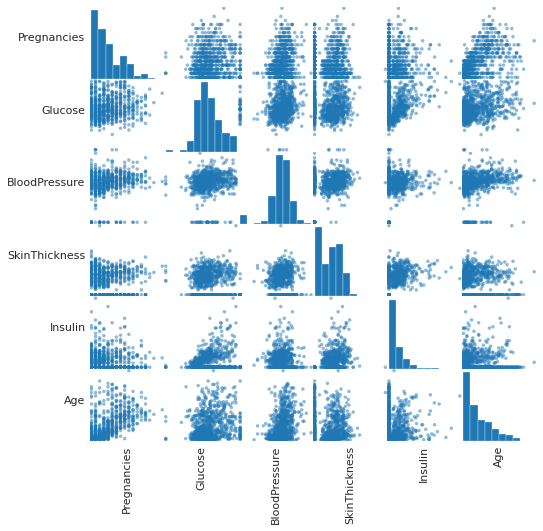

In [ ]:
import pandas.plotting

numeric_data = X.select(numeric_features).toPandas()
axs = scatter_matrix(numeric_data, figsize=(8, 8));
n = len(numeric_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [ ]:
# Revisión de tipo de datos
labels.dtypes

[('Pregnancies', 'int'),
 ('Glucose', 'int'),
 ('BloodPressure', 'int'),
 ('SkinThickness', 'int'),
 ('Insulin', 'int'),
 ('BMI', 'double'),
 ('DiabetesPedigreeFunction', 'double'),
 ('Age', 'int'),
 ('Outcome', 'int')]

### 2.6 Verifica calidad de los datos

Este dataset diabetes.csv con una muy buena distribución para trabajar

## 3. Data preparation
---

### 3.1 Seleccionar los labels
En este caso vamos a trabajar con todos

In [ ]:
labels.show(5)
X.show(5)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+--------------------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|            features|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+--------------------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|[6.0,148.0,72.0,3...|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|[1.0,85.0,66.0,29...|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|[8.0,183.0,64.0,0...|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|[1.0,89.0,66.0,23...|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|[0.0,137.0,40.0,3...|
+-----------+-------+-----------

### 3.2 Ensamblaje de columnas

Vamos a trabajar con todas las características que nos brinda el dataset Pima

1.   Clean data
2.   Construct data
3.   Integrate data
4.   Format data



### 3.3 Indexando datos categoricos

Este proceso no es necesario realizarlo, debido a que el dataset Pima no esta conformado por datos tipo string, sino double e integer.


### 3.4 Crear objeto ensamblador

In [ ]:
assembler = VectorAssembler(
    inputCols=['Pregnancies', 
               'Glucose', 
               'BloodPressure', 
               'SkinThickness', 
               'Insulin', 
               'BMI', 
               'DiabetesPedigreeFunction', 
               'Age'
              ], outputCol='features')

### 3.5 Consolidación de las columnas de predicción

In [ ]:
labels = assembler.transform(labels)

In [ ]:
labels.show(5)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+--------------------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|            features|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+--------------------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|[6.0,148.0,72.0,3...|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|[1.0,85.0,66.0,29...|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|[8.0,183.0,64.0,0...|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|[1.0,89.0,66.0,23...|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|[0.0,137.0,40.0,3...|
+-----------+-------+-----------

### 3.6 Dividir el conjunto de entrenamiento en Train/test 

In [ ]:
# Dividir las muestras en 80% y 20% son las buenas prácticas de aprendizaje de máquina
labels_train, labels_test = labels.randomSplit([0.8, 0.2], seed=17)

# Comprueba que el dataset cuenta con aprox 80 registros
labels_ratio = labels_train.count() /labels.count()
print('labels_ratio', labels_ratio)

type(labels_train)

labels_ratio 0.796875


pyspark.sql.dataframe.DataFrame

In [ ]:
print("Training Dataset Count: " + str(labels_train.count()))
print("Test Dataset Count: " + str(labels_test.count()))

Training Dataset Count: 612
Test Dataset Count: 156


## Modelo de Regresión Logística
---

Según Alapydin, es uno de los algoritmos más utilizados para la clasificación binaria, se caracteriza por su sencillez en la implementación.

Se plantea matemáticamente de la siguiente forma:

1.   Una combinación lineal
2.   Una función logistica sigmoide

<img src="https://raw.githubusercontent.com/DianaCarolinaCabrera/DianaCarolinaCabrera.github.io/master/formula.PNG" width="500" align="center"/>

Frecuentemente es utilizada en aplicaciones como:

*   Email: Spam / No spam
*   Tumor: Benigno/ Maligno








In [ ]:
features = labels_train_f.columns
print('features', features)
label_y = y_train.columns
print('label_y', label_y)

features ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
label_y ['Outcome']


### 4.1 Importa el modelo con el que se desea trabajar, en este caso vamos a utilizar LogisticRegression

In [ ]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(featuresCol = 'features', labelCol = 'Outcome', maxIter=10)
lrModel = lr.fit(labels_train)

### 4.2 Se obtienen los coeficientes utilizando los atributos del Modelo de Regresión logística

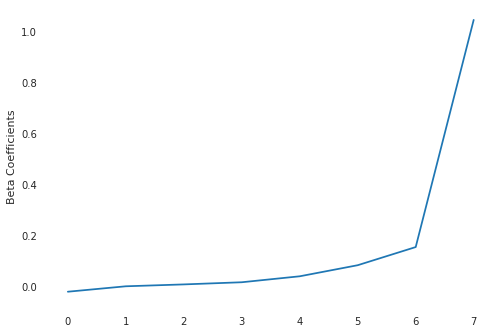

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

beta = np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

Se pueden obtener las caracteristicas de la curva ROC: 
- False Positive Rate (FPR)
- True Positive Rate (TPR)

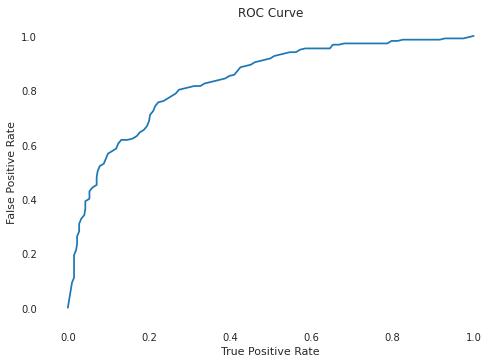

Training set areaUnderROC: 0.8328122265647784


In [ ]:
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

### 4.3 Mediciones de precisión y recall

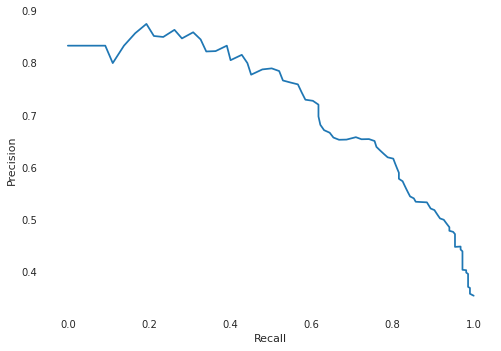

In [ ]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

### 4.4 Predicciones sobre el conjunto de prueba

In [ ]:
predictions = lrModel.transform(labels_test)
predictions.select('Pregnancies', 'Glucose', 'Outcome', 'rawPrediction', 'prediction', 'probability').show(10)

+-----------+-------+-------+--------------------+----------+--------------------+
|Pregnancies|Glucose|Outcome|       rawPrediction|prediction|         probability|
+-----------+-------+-------+--------------------+----------+--------------------+
|          0|     57|      0|[3.78856458550949...|       0.0|[0.97787264001678...|
|          0|     84|      0|[3.09041898840719...|       0.0|[0.95649580315013...|
|          0|     93|      0|[2.70996616759583...|       0.0|[0.93761216960289...|
|          0|     99|      0|[1.71940694413954...|       0.0|[0.84805243123202...|
|          0|    100|      0|[2.38134158751153...|       0.0|[0.91539339589790...|
|          0|    102|      0|[1.40373893548987...|       0.0|[0.80277653086854...|
|          0|    106|      0|[1.51582792040454...|       0.0|[0.81992329887021...|
|          0|    107|      0|[2.63348697883854...|       0.0|[0.93298589597705...|
|          0|    108|      0|[1.92317180133850...|       0.0|[0.87249171343009...|
|   

### 4.5 Evaluación del modelo aplicado:

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(rawPredictionCol='rawPrediction', labelCol='Outcome', metricName='areaUnderROC')

print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.8545284780578899


## Clasificador arboles de decisión
---

Se destaca por su facilidad al interpretarlo, manejan características por categorias. Es usado para clasificación multiclase, siendo capaz de trabajar no linealidades e interacciones entre características.

### 5.1 Importar librería para trabajar con Clasificador de Arboles de Decisión

In [82]:
from pyspark.ml.classification import DecisionTreeClassifier

dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'Outcome', maxDepth = 3)

#Modelamiento sobre el conjunto de entrenamiento
dtModel = dt.fit(labels_train)

#Transformación con el conjunto de pruebas
predictions = dtModel.transform(labels_test)
predictions.select('Pregnancies', 'Glucose', 'Outcome', 'rawPrediction', 'prediction', 'probability').show(10)

+-----------+-------+-------+-------------+----------+--------------------+
|Pregnancies|Glucose|Outcome|rawPrediction|prediction|         probability|
+-----------+-------+-------+-------------+----------+--------------------+
|          0|     57|      0|  [92.0,49.0]|       0.0|[0.65248226950354...|
|          0|     84|      0| [213.0,25.0]|       0.0|[0.89495798319327...|
|          0|     93|      0| [213.0,25.0]|       0.0|[0.89495798319327...|
|          0|     99|      0| [213.0,25.0]|       0.0|[0.89495798319327...|
|          0|    100|      0| [213.0,25.0]|       0.0|[0.89495798319327...|
|          0|    102|      0| [213.0,25.0]|       0.0|[0.89495798319327...|
|          0|    106|      0| [213.0,25.0]|       0.0|[0.89495798319327...|
|          0|    107|      0| [213.0,25.0]|       0.0|[0.89495798319327...|
|          0|    108|      0|  [92.0,49.0]|       0.0|[0.65248226950354...|
|          0|    109|      1|  [92.0,49.0]|       0.0|[0.65248226950354...|
+-----------

### 5.2 Evaluación Modelo de Arboles de Decisión

In [83]:
evaluator = BinaryClassificationEvaluator(rawPredictionCol='rawPrediction', labelCol='Outcome', metricName='areaUnderROC')
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.7268907563025211


## Clasificador Bosques Aleatorios (Random Forest)
---

Es una combinación de arboles, considerado como un ensamble en aprendizaje de máquina supervisado para clasificación. Se considera como la solución a muchas oportunidades de querer plantear algo sencillo pero robusto. Cada árbol entrega una clasificación, en donde el resultado es la clase con mayor número de votos en todo el bosque.

Les recomiendo: https://bookdown.org/content/2031/ensambladores-random-forest-parte-i.html

### 6.1 Importar librería para trabajar con Clasificador de Bosques Aleatorios

In [85]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'Outcome')

#Modelamiento sobre el conjunto de entrenamiento
rfModel = rf.fit(labels_train)

#Transformación con el conjunto de pruebas
predictions = rfModel.transform(labels_test)
predictions.select('Pregnancies', 'Glucose', 'Outcome', 'rawPrediction', 'prediction', 'probability').show(10)

+-----------+-------+-------+--------------------+----------+--------------------+
|Pregnancies|Glucose|Outcome|       rawPrediction|prediction|         probability|
+-----------+-------+-------+--------------------+----------+--------------------+
|          0|     57|      0|[17.2127027159460...|       0.0|[0.86063513579730...|
|          0|     84|      0|[15.8712312733067...|       0.0|[0.79356156366533...|
|          0|     93|      0|[19.0066389955367...|       0.0|[0.95033194977683...|
|          0|     99|      0|[19.0972093923668...|       0.0|[0.95486046961834...|
|          0|    100|      0|[16.8248254908964...|       0.0|[0.84124127454482...|
|          0|    102|      0|[16.4127467938898...|       0.0|[0.82063733969449...|
|          0|    106|      0|[16.6434291444483...|       0.0|[0.83217145722241...|
|          0|    107|      0|[19.2365543288928...|       0.0|[0.96182771644464...|
|          0|    108|      0|[13.8201700139143...|       0.0|[0.69100850069571...|
|   

### 6.2 Evaluación Modelo de Bosques Aleatorios

In [86]:
evaluator = BinaryClassificationEvaluator(rawPredictionCol='rawPrediction', labelCol='Outcome', metricName='areaUnderROC')
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.8414565826330533
